In [46]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from keras.layers import Dropout


In [47]:
features = utils.load('data/fma_metadata/DBMERGEfeatures.csv')

features.shape

(25000, 520)

In [48]:
features

feature    metadata               chroma_cens                                \
statistics      set         track    kurtosis                                 
number       subset     genre_top          01        02        03        04   
track_id                                                                      
2             small       Hip-Hop    7.180653  5.230309  0.249321  1.347620   
3            medium       Hip-Hop    1.888963  0.760539  0.345297  2.295201   
5             small       Hip-Hop    0.527563 -0.077654 -0.279610  0.685883   
10            small           Pop    3.702245 -0.291193  2.196742 -0.234449   
134          medium       Hip-Hop    0.918445  0.674147  0.577818  1.281117   
...             ...           ...         ...       ...       ...       ...   
155297       medium  Instrumental   -0.007668  0.104604 -0.511487  0.857308   
155298       medium          Folk   -0.956019 -0.961210 -0.447053 -0.689531   
155306       medium          Folk    0.644815 -0.879404 -1.149232 -0.655986   
155307       medium  Experimental   -0.446937  1.235004 -0.250855 -0.612224   
155314       medium          Rock   -0.121936 -0.348523 -0.555810 -0.607600   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            05        06        07        08  ...        04        05   
track_id                                            ...                       
2           1.482478  0.531371  1.481593  2.691455  ...  0.054125  0.012226   
3           1.654031  0.067592  1.366848  1.054094  ...  0.063831  0.014212   
5           1.937570  0.880839 -0.923192 -0.927232  ...  0.040730  0.012691   
10          1.367364  0.998411  1.770694  1.604566  ...  0.074358  0.017952   
134         0.933746  0.078177  1.199204 -0.175223  ...  0.058766  0.016322   
...              ...       ...       ...       ...  ...       ...       ...   
155297      0.266202 -0.355186 -0.273640 -0.324727  ...  0.141844  0.024080   
155298     -0.633071 -0.430116 -0.031147 -0.758652  ...  0.177286  0.028411   
155306     -0.848881 -0.672240  0.193149  0.069103  ...  0.125615  0.027110   
155307     -1.197387 -1.118230  0.716520 -0.878211  ...  0.099894  0.019141   
155314     -0.823013 -0.369621 -0.573967  0.554874  ...  0.089492  0.019214   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134         0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...              ...        ...       ...       ...       ...       ...   
155297      0.031020  70.604774  0.850586  0.034100  0.020996  0.001953   
155298      0.025631  45.445824  0.303711  0.024058  0.019531  0.000000   
155306      0.028815  17.076239  0.247070  0.031542  0.025879  0.004883   
155307      0.033045   6.458911  0.344727  0.069199  0.063477  0.001953   
155314      0.018619   8.916731  0.227051  0.042894  0.039551  0.006348   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
134         1.806106  0.054623  
...              ...       ...  
155297      8.380918  0.088828  
155298      5.786194  0.023428  
155306      3.179079  0.022023  
155307      1.996085  0.043098  
155314      1.989080  0.019288  

[25000

In [49]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top')]

df_SOLO_FEATURES=features.drop([('metadata','track','genre_top'),('metadata','set','subset')], axis = 1)
df_SOLO_FEATURES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 99.0 MB


In [50]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[ 4.46539515,  3.32014904,  0.00464993, ..., -0.53198627,
        -0.37836742,  0.8357439 ],
       [ 1.10042581,  0.44944872,  0.02508234, ..., -0.53198627,
        -0.50976727,  1.14486521],
       [ 0.2347154 , -0.08887939, -0.1079549 , ..., -0.53198627,
        -0.3419454 ,  0.18520897],
       ...,
       [ 0.30927562, -0.60380154, -0.29308978, ...,  0.47541085,
         0.00518424, -0.71044745],
       [-0.3849665 ,  0.75417258, -0.10183307, ..., -0.12902742,
        -0.41139353,  0.11606812],
       [-0.17829937, -0.26284425, -0.16675545, ...,  0.77762998,
        -0.41386034, -0.81769282]])

In [51]:
df_features = pd.DataFrame(X,columns=df_SOLO_FEATURES.columns, index=df_SOLO_FEATURES.index)
df_features[('metadata','track','genre_top')]=y
df_features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             4.465395  3.320149  0.004650  0.506553  0.817572  0.189210   
3             1.100426  0.449449  0.025082  0.889646  0.918870 -0.038029   
5             0.234715 -0.088879 -0.107955  0.239023  1.086292  0.360440   
10            2.253486 -0.226024  0.419239 -0.133054  0.749601  0.418047   
134           0.483276  0.393964  0.074584  0.479667  0.493560 -0.032843   
...                ...       ...       ...       ...       ...       ...   
155297       -0.105636  0.028175 -0.157319  0.308327  0.099393 -0.245179   
155298       -0.708690 -0.656341 -0.143602 -0.317036 -0.431604 -0.281893   
155306        0.309276 -0.603802 -0.293090 -0.303475 -0.559034 -0.400527   
155307       -0.384966  0.754173 -0.101833 -0.285782 -0.764817 -0.619050   
155314       -0.178299 -0.262844 -0.166755 -0.283913 -0.543759 -0.252252   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
track_id                                            ...                       
2           0.812034  1.160839  0.478648  0.609644  ... -1.523210 -1.600303   
3           0.744623  0.401951  0.021627  0.250656  ... -1.181008 -0.626769   
5          -0.600742 -0.516359  0.358032  0.459155  ... -1.443085 -1.142287   
10          0.981877  0.657085  0.270455  0.928416  ... -0.536593 -1.287152   
134         0.646135 -0.167816  0.513952  0.658010  ... -0.817363 -0.958903   
...              ...       ...       ...       ...  ...       ...       ...   
155297     -0.219140 -0.237108 -0.107553 -0.627041  ...  0.519327  1.669785   
155298     -0.076678 -0.438225 -0.702094 -0.015581  ...  1.265490  0.737782   
155306      0.055092 -0.054575 -0.151336 -0.411841  ...  1.041262  1.288489   
155307      0.362565 -0.493639 -0.427646  0.036455  ... -0.331798  2.019999   
155314     -0.395577  0.170571 -0.588834 -0.556659  ... -0.319110 -0.474817   

feature          zcr                                                    \
statistics  kurtosis       max      mean    median       min      skew   
number            01        01        01        01        01        01   
track_id                                                                 
2          -0.297800  0.401689  1.140749  0.984224 -0.531986 -0.378367   
3          -0.337983  0.439089  1.103785  0.718632 -0.531986 -0.509767   
5          -0.283428 -0.060468 -0.002880 -0.095852 -0.531986 -0.341945   
10         -0.083134  0.361617  0.855331  1.001930 -0.531986  0.133097   
134        -0.311876  0.182632  0.392997  0.240565 -0.531986 -0.478292   
...              ...       ...       ...       ...       ...       ...   
155297      0.590234  2.541501 -0.671650 -0.839511 -0.129027  1.836951   
155298      0.245694 -0.450496 -1.024827 -0.892630 -0.531986  0.923250   
155306     -0.142814 -0.760382 -0.761601 -0.662449  0.475411  0.005184   
155307     -0.288214 -0.226096  0.562873  0.700926 -0.129027 -0.411394   
155314     -0.254555 -0.869910 -0.362337 -0.166677  0.777630 -0.413860   

feature                   metadata  
statistics       std         track  
number            01     genre_top  
track_id                            
2           0.835744       Hip-Hop  
3           1.144865       Hip-Hop  
5           0.185209       Hip-Hop  
10          0.025976           Pop  
134         0.568069       Hip-Hop  
...              ...           ...  
155297      1.909530  Instrumental  
155298     -0.655332          Folk  
155306     -0.710447          Folk  
155307      0.116068  Experimental  
155314     -0.817693          Rock  

[25000

In [52]:
attributes = [col for col in df_features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = df_features[attributes].values
y = df_features[('metadata','track','genre_top')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [82]:
clf = MLPClassifier(random_state=0,solver='adam', learning_rate='adaptive', hidden_layer_sizes=(1024,512,256,128),
                  alpha=0.03, activation='tanh',early_stopping=True, validation_fraction=0.2)

clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.03, early_stopping=True,
              hidden_layer_sizes=(1024, 512, 256, 128),
              learning_rate='adaptive', random_state=0,
              validation_fraction=0.2)

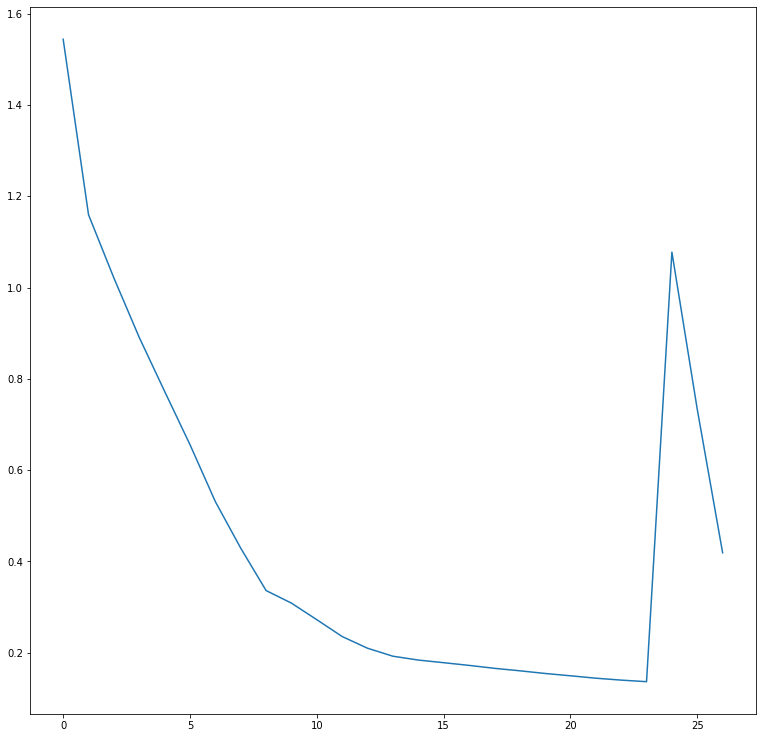

In [83]:
plt.plot(clf.loss_curve_)
plt.show()

In [84]:
y_pred_tr = clf.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)

Train Accuracy 0.9353714285714285
Train F1-score 0.9223722440525797
Val Recall 0.903534896217966
Val Precision 0.9437592453518875
                     precision    recall  f1-score   support

              Blues       0.92      0.87      0.89        52
          Classical       0.96      0.96      0.96       433
            Country       0.97      0.84      0.90       124
     Easy Listening       1.00      0.93      0.97        15
         Electronic       0.93      0.96      0.95      4420
       Experimental       0.91      0.89      0.90      1576
               Folk       0.92      0.93      0.92      1063
            Hip-Hop       0.94      0.94      0.94      1541
       Instrumental       0.91      0.87      0.89       945
      International       0.93      0.92      0.92       713
               Jazz       0.95      0.88      0.91       269
Old-Time / Historic       0.99      0.99      0.99       357
                Pop       0.89      0.82      0.86       830
               

array([[  45,    0,    0,    0,    1,    0,    1,    1,    0,    0,    0,
           0,    1,    3,    0,    0],
       [   0,  415,    0,    0,    1,    3,    2,    0,    7,    2,    1,
           0,    1,    1,    0,    0],
       [   0,    0,  104,    0,    2,    1,    6,    0,    0,    3,    0,
           0,    2,    6,    0,    0],
       [   0,    0,    0,   14,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    1,    0,    0, 4251,   29,    7,   36,   24,    9,    2,
           0,   14,   46,    1,    0],
       [   0,    3,    0,    0,   71, 1399,   14,   11,   14,    4,    1,
           1,    9,   48,    0,    1],
       [   0,    1,    0,    0,    9,   17,  987,    2,    8,    4,    1,
           0,    6,   28,    0,    0],
       [   1,    0,    0,    0,   69,    3,    0, 1446,    2,    5,    0,
           0,    6,    9,    0,    0],
       [   0,    6,    0,    0,   42,   25,    7,    2,  821,    2,    1,
           0,    8,   

In [85]:
y_pred = clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.6704
Train F1-score 0.5015354274033615
Val Recall 0.47754314775906276
Val Precision 0.5941246413052784
                     precision    recall  f1-score   support

              Blues       1.00      0.09      0.17        22
          Classical       0.73      0.77      0.75       186
            Country       0.63      0.31      0.42        54
     Easy Listening       0.00      0.00      0.00         6
         Electronic       0.67      0.80      0.73      1894
       Experimental       0.50      0.40      0.44       675
               Folk       0.67      0.63      0.65       456
            Hip-Hop       0.67      0.60      0.63       660
       Instrumental       0.48      0.40      0.44       405
      International       0.63      0.50      0.56       305
               Jazz       0.50      0.46      0.48       115
Old-Time / Historic       0.92      0.95      0.94       153
                Pop       0.30      0.21      0.25       356
               Rock       0

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[   2,    0,    0,    0,    1,    6,    2,    2,    0,    2,    1,
           0,    0,    5,    0,    1],
       [   0,  143,    0,    0,    2,    8,    2,    0,    8,    4,    7,
           1,    2,    9,    0,    0],
       [   0,    0,   17,    0,    0,    2,    7,    0,    0,    5,    0,
           0,    3,   19,    0,    1],
       [   0,    0,    0,    0,    2,    0,    0,    2,    1,    0,    1,
           0,    0,    0,    0,    0],
       [   0,    7,    1,    0, 1515,   65,   12,   83,   55,   13,    8,
           0,   36,   96,    2,    1],
       [   0,   15,    2,    0,  165,  269,   25,   18,   37,   12,    8,
           4,   23,   92,    0,    5],
       [   0,    3,    2,    0,    9,   34,  288,    5,   14,    7,    2,
           3,   20,   69,    0,    0],
       [   0,    0,    0,    0,  185,   11,    5,  395,    6,    5,    2,
           0,   16,   33,    2,    0],
       [   0,   19,    0,    0,   74,   43,   29,    4,  163,    4,    1,
           1,   11,   

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[   0    0    1    0    0    7    3    1    0    1    2    0    0    7
     0    0]
 [   0  155    0    0    2    4    3    0    7    2    7    0    1    4
     0    1]
 [   0    0   21    0    2    1    7    1    0    2    1    0    1   17
     0    1]
 [   0    0    0    0    2    1    0    2    1    0    0    0    0    0
     0    0]
 [   0   11    0    0 1460   80   14  101   37   15   12    1   43  113
     7    0]
 [   0   19    1    0  174  261   35   19   39    9   14    5   16   81
     0    2]
 [   0    3    2    0   15   19  319    4   13    4    1    2   12   62
     0    0]
 [   0    0    1    0  156    7    9  421    3    5    0    0   18   38
     2    0]
 [   0   21    0    0  101   45   35    2  148    4    4    1    6   38
     0    0]
 [   0    4    6    0   52   11   16   27    2  133    6    1    9   35
     2    1]
 [   0    8    0    0    7   13   11    2    6    3   50    0    2   13
     0    0]
 [   0    4    0    0    

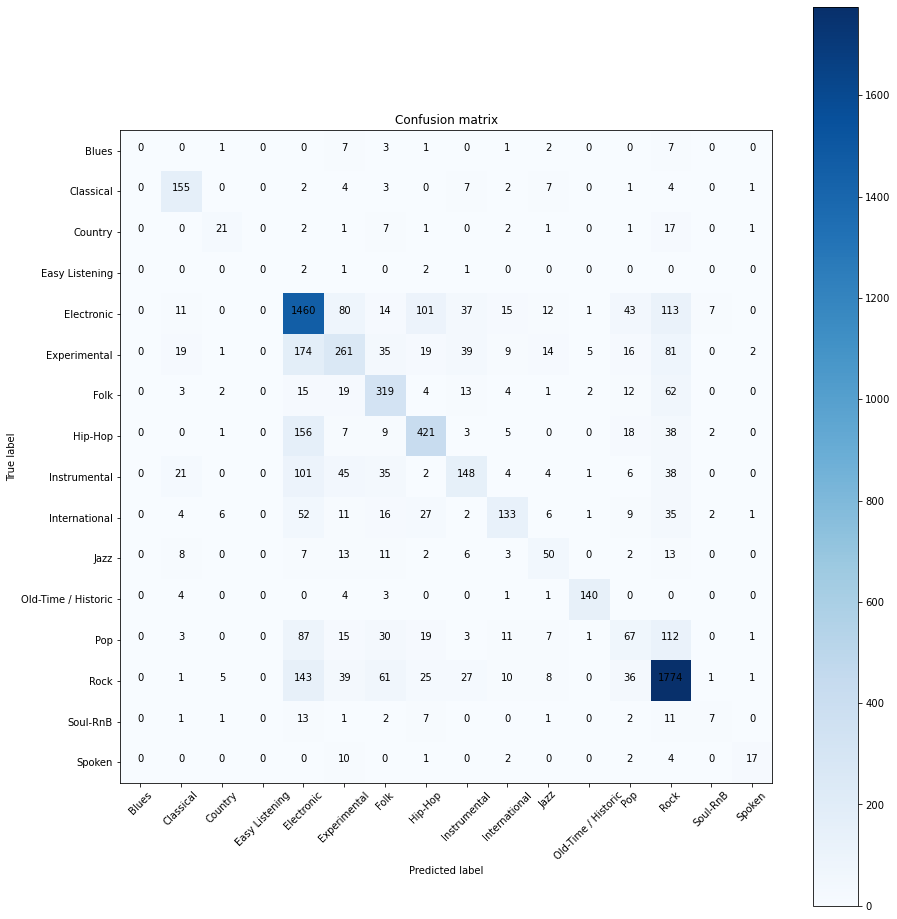

In [77]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=clf.classes_,
                      title='Confusion matrix')



plt.show()